# Generate plot visualizing key stats for AMIP1 -> CMIP6 MIP eras

### Updates
* PJD 12 Sep 2022 - Updated to qualify forcing is DECK/historical only
* PJD 12 Sep 2022 - Remove forcing from top plot
* PJD 14 Jun 2024 - Updated with font augmented 1.5/complete plot
* PJD 10 Dec 2024 - Corrected experiment and model counts
* PJD  5 Jun 2025 - Added data size log-plot
* PJD  5 Jun 2025 - Fix Fig1.7 y-axis

## [imports](#1p1-Imports)

In [1]:
%%time
import matplotlib.pyplot as plt
from matplotlib.text import Text
import numpy as np
import datetime
import os

CPU times: user 233 ms, sys: 48 ms, total: 281 ms
Wall time: 317 ms


## [define time info](#1p2-DefineTimeInfo)

In [2]:
%%time
timeNow = datetime.datetime.now()
timeFormat = timeNow.strftime("%y%m%dT%H%M%S")
print("timeFormat:", timeFormat)

timeFormat: 250605T155335
CPU times: user 47 μs, sys: 2 μs, total: 49 μs
Wall time: 49.8 μs


## [define input data](#1p3-DefineInputData)

In [3]:
%%time
labels = ["AMIP1", "AMIP2", "CMIP1", "CMIP2", "CMIP3", "CMIP5", "CMIP6"]
experiments = [1, 1, 1, 2, 12, 37, 322]  # CMIP6 values pulled from https://github.com/WCRP-CMIP/CMIP6_CVs
models = [29, 32, 20, 17, 24, 59, 132]
institutions = [28, 25, 16, 15, 16, 26, 49]
countries = [9, 9, 8, 8, 11, 12, 26]
forcingCounts = [2, 2, 0, 1, 15, 24, 63]  # https://docs.google.com/presentation/d/1_51Oohg4unT_W_F2xskYoOB3yIshMwxBBEnD6gIBI7Q/edit?usp=sharing
forcingCountsBlank = np.empty(7,)
forcingCountsBlank[:] = np.nan


CPU times: user 9 μs, sys: 1 μs, total: 10 μs
Wall time: 10 μs


## [first plot - no forcing](#1p4-NoForcing)

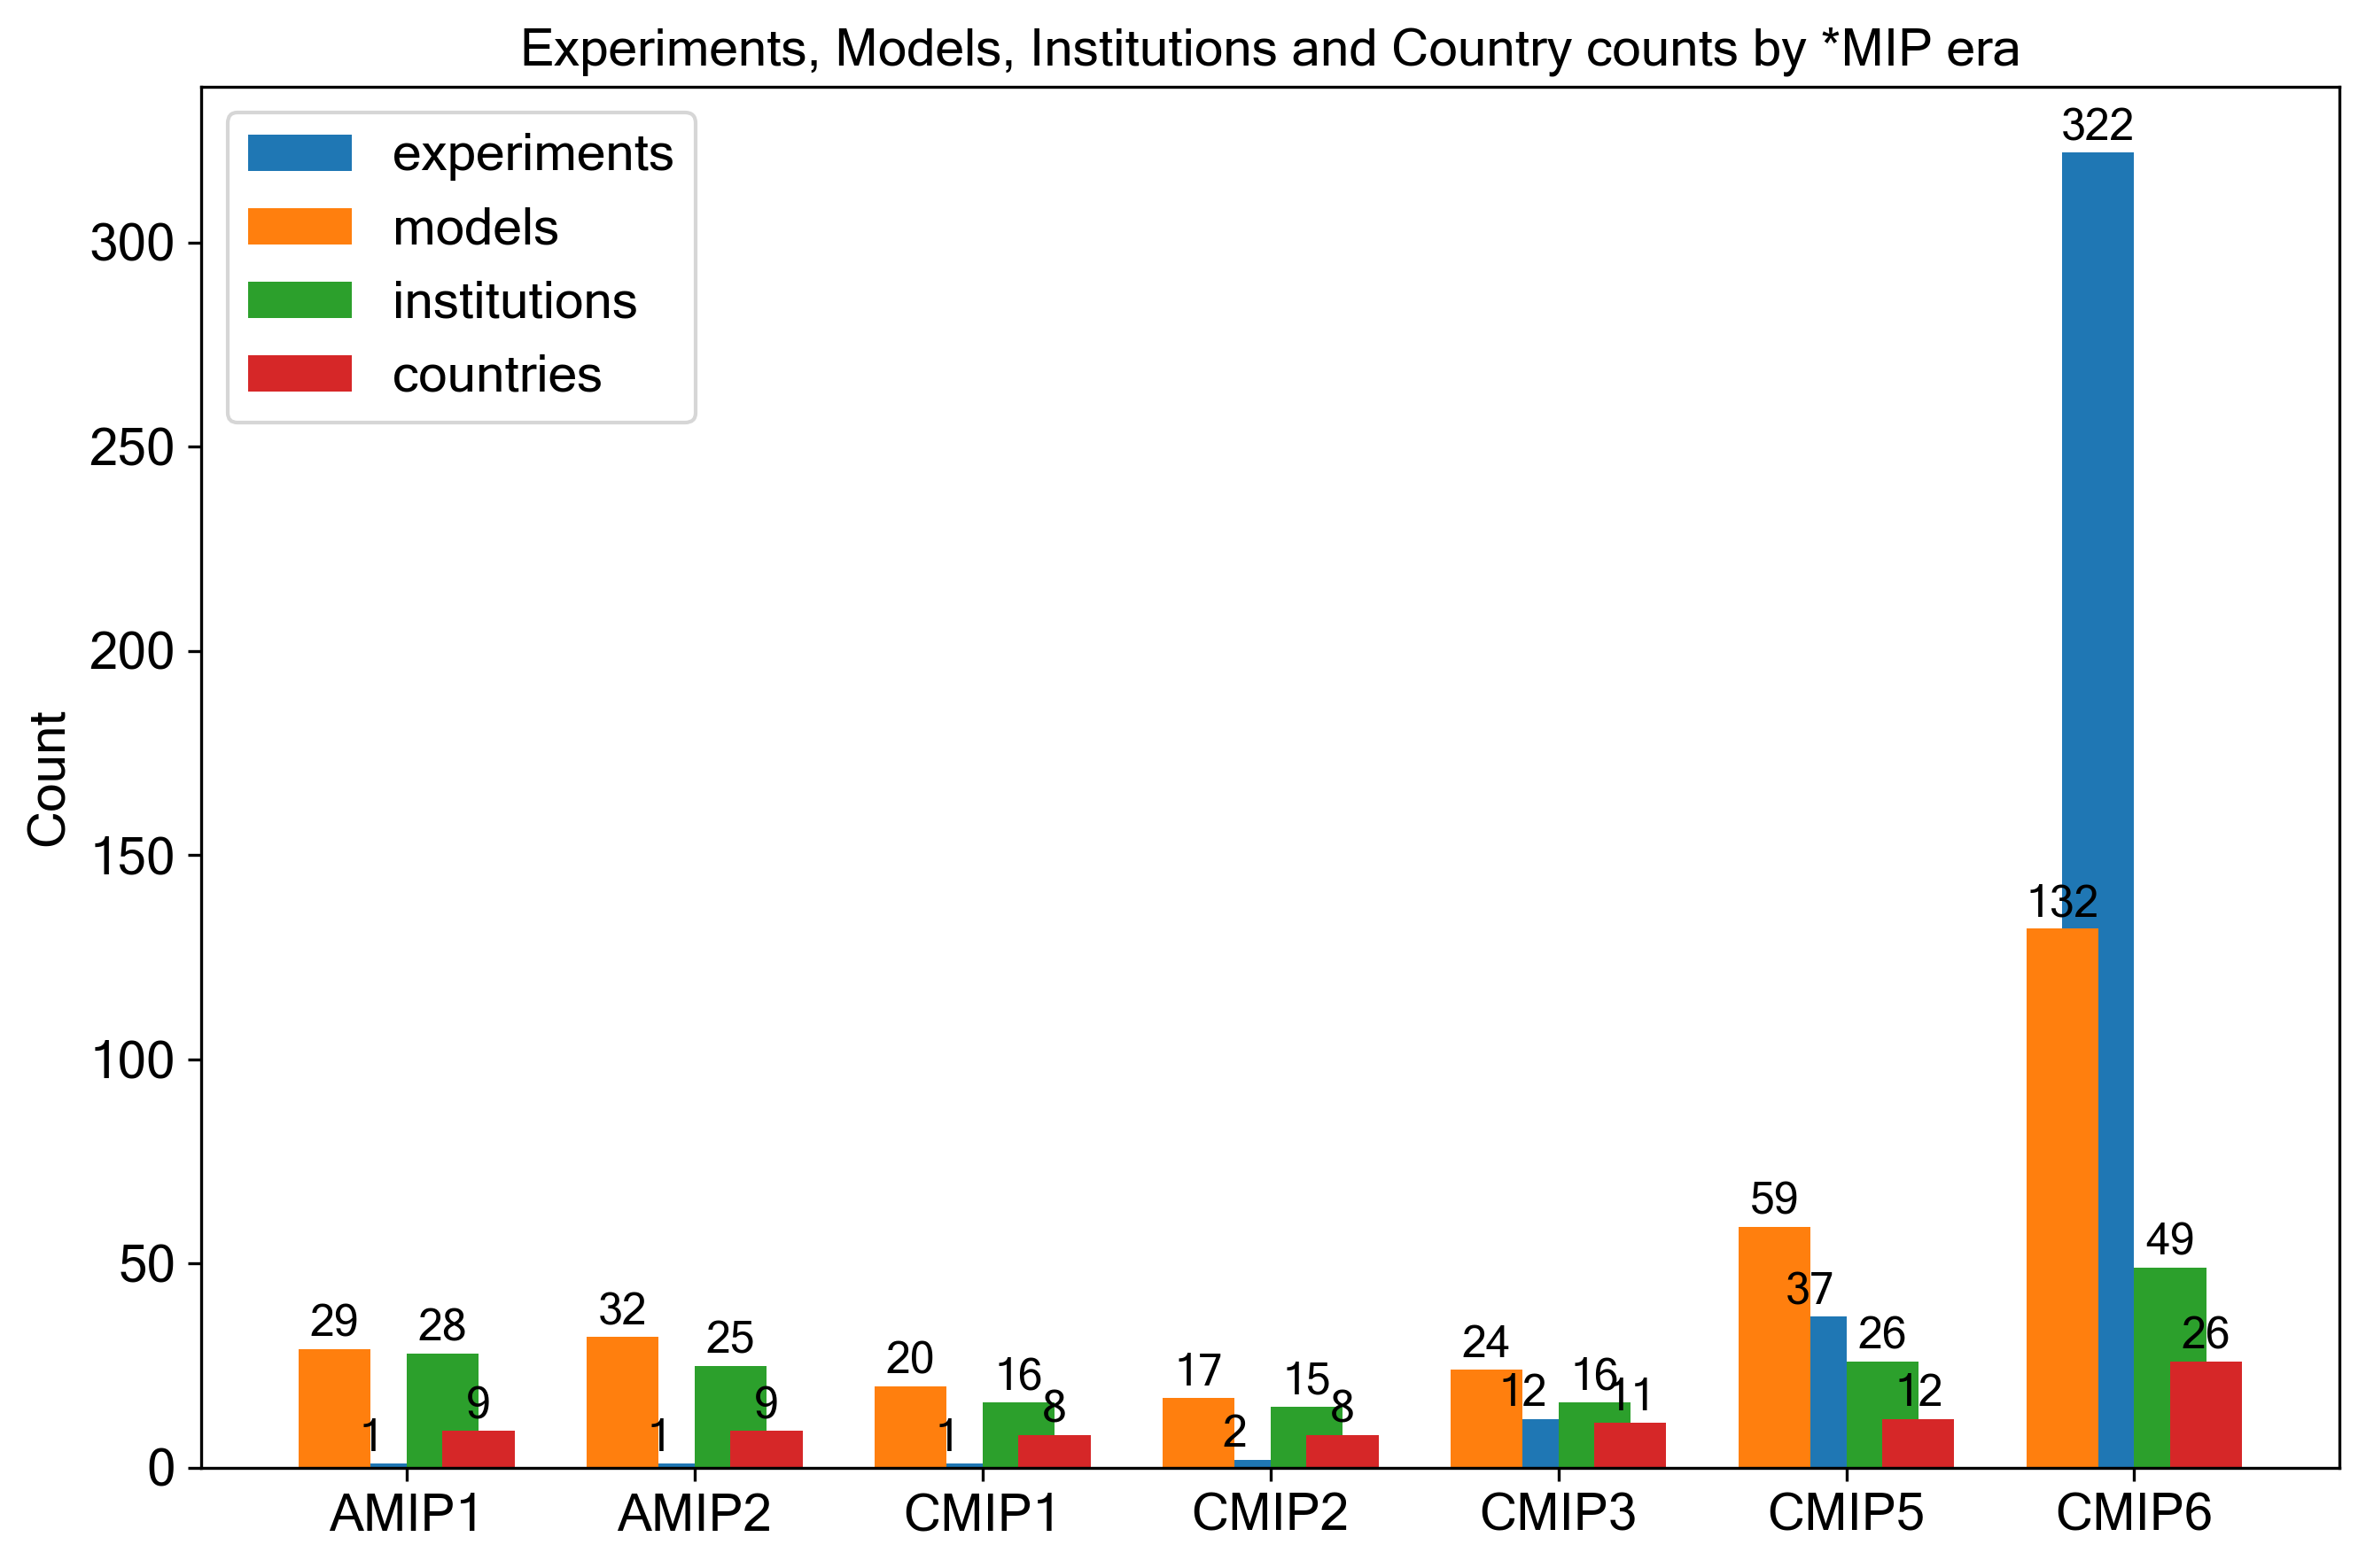

In [4]:
# set inputs
x = np.arange(len(labels))  # label locations
width = 0.25  # width of the bars
fontsize = 14
fontName = "Microsoft Sans Serif"

# initialize canvas
fig, ax = plt.subplots(figsize=(9, 6), dpi=300)

# plot
rects1 = ax.bar(x - width * 0.5, experiments, width, label="experiments")
rects3 = ax.bar(x - width, models, width, label="models")
rects2 = ax.bar(x + width * 0.5, institutions, width, label="institutions")
rects4 = ax.bar(x + width, countries, width, label="countries")
# rects5 = ax.bar(x + width*1.5, forcingCountsBlank, width, label="forcings (DECK/historical only - no *MIPs considered)")

# pretty things up - add text for labels, title and custom x-axis tick labels, etc.
ax.set_title(
    "Experiments, Models, Institutions and Country counts by *MIP era",
    fontname=fontName,
    fontsize=fontsize,
)
ax.set_ylabel("Count", fontname=fontName, fontsize=fontsize)
plt.yticks(fontname=fontName, fontsize=fontsize)
ax.set_xticks(x, labels, fontname=fontName, fontsize=fontsize)
ax.legend(prop={"family": fontName, "size": fontsize})

# label cleanup
padding = 1
labelSize = 12

ax.bar_label(rects1, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects2, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects3, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects4, padding=padding, fontname=fontName, fontsize=labelSize)
# ax.bar_label(rects5, padding=padding, fontname=fontName, fontsize=labelSize)

# fill canvas
fig.tight_layout()

# display, save and close
plt.show()
fig.savefig("_".join([timeFormat, "MIPEvolution-Counts.png"]))

## [now plot - with forcing](#1p5-WithForcing)

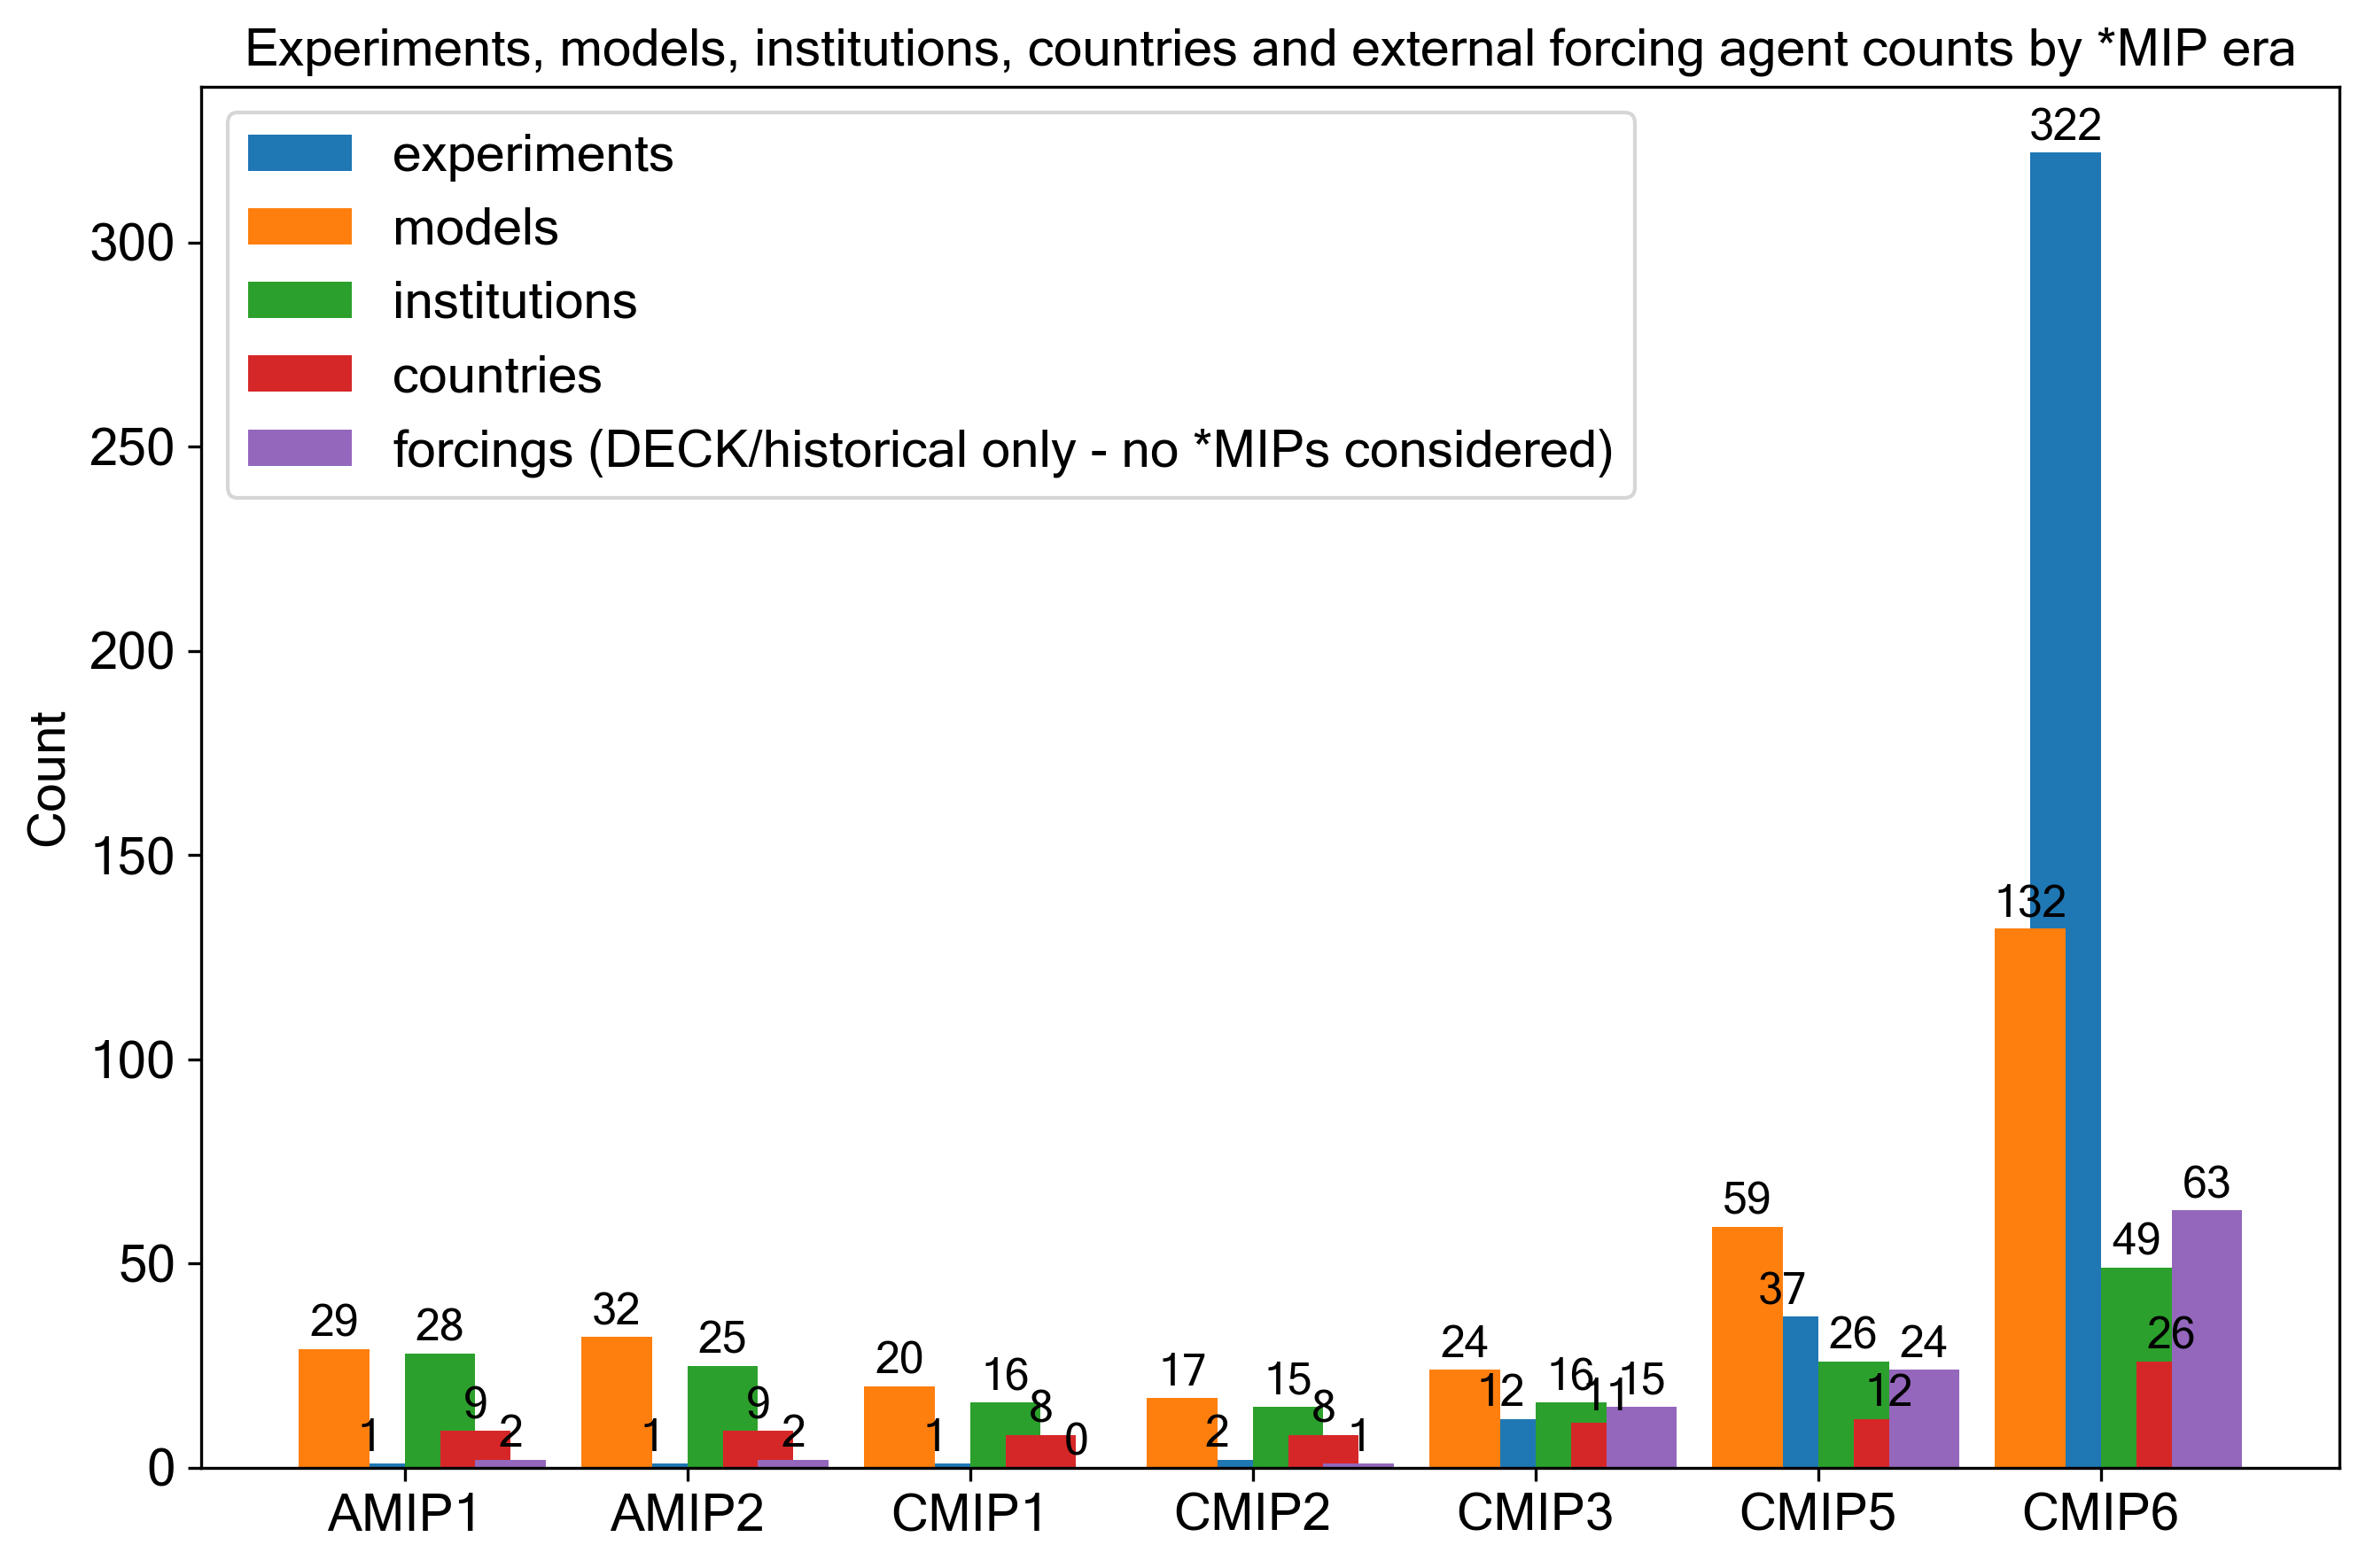

In [5]:
# set inputs
x = np.arange(len(labels))  # label locations
width = 0.25  # width of the bars
fontsize = 14
fontName = "Microsoft Sans Serif"

# initialize canvas
fig, ax = plt.subplots(figsize=(9, 6), dpi=300)

# plot
rects1 = ax.bar(x - width * 0.5, experiments, width, label="experiments")
rects3 = ax.bar(x - width, models, width, label="models")
rects2 = ax.bar(x + width * 0.5, institutions, width, label="institutions")
rects4 = ax.bar(x + width, countries, width, label="countries")
rects5 = ax.bar(
    x + width * 1.5,
    forcingCounts,
    width,
    label="forcings (DECK/historical only - no *MIPs considered)",
)

# pretty things up - add text for labels, title and custom x-axis tick labels, etc.
ax.set_title(
    "Experiments, models, institutions, countries and external forcing agent counts by *MIP era",
    fontname=fontName,
    fontsize=fontsize,
)
ax.set_ylabel("Count", fontname=fontName, fontsize=fontsize)
plt.yticks(fontname=fontName, fontsize=fontsize)
ax.set_xticks(x, labels, fontname=fontName, fontsize=fontsize)
ax.legend(prop={"family": fontName, "size": fontsize})

# label cleanup
padding = 1
labelSize = 12

ax.bar_label(rects1, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects2, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects3, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects4, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects5, padding=padding, fontname=fontName, fontsize=labelSize)

# fill canvas
fig.tight_layout()

# display, save and close
plt.show()
fig.savefig("_".join([timeFormat, "MIPEvolution-Counts-plusForcing.png"]))

## [now plot - with forcing, with fonts augmented](#1p6-WithForcing)

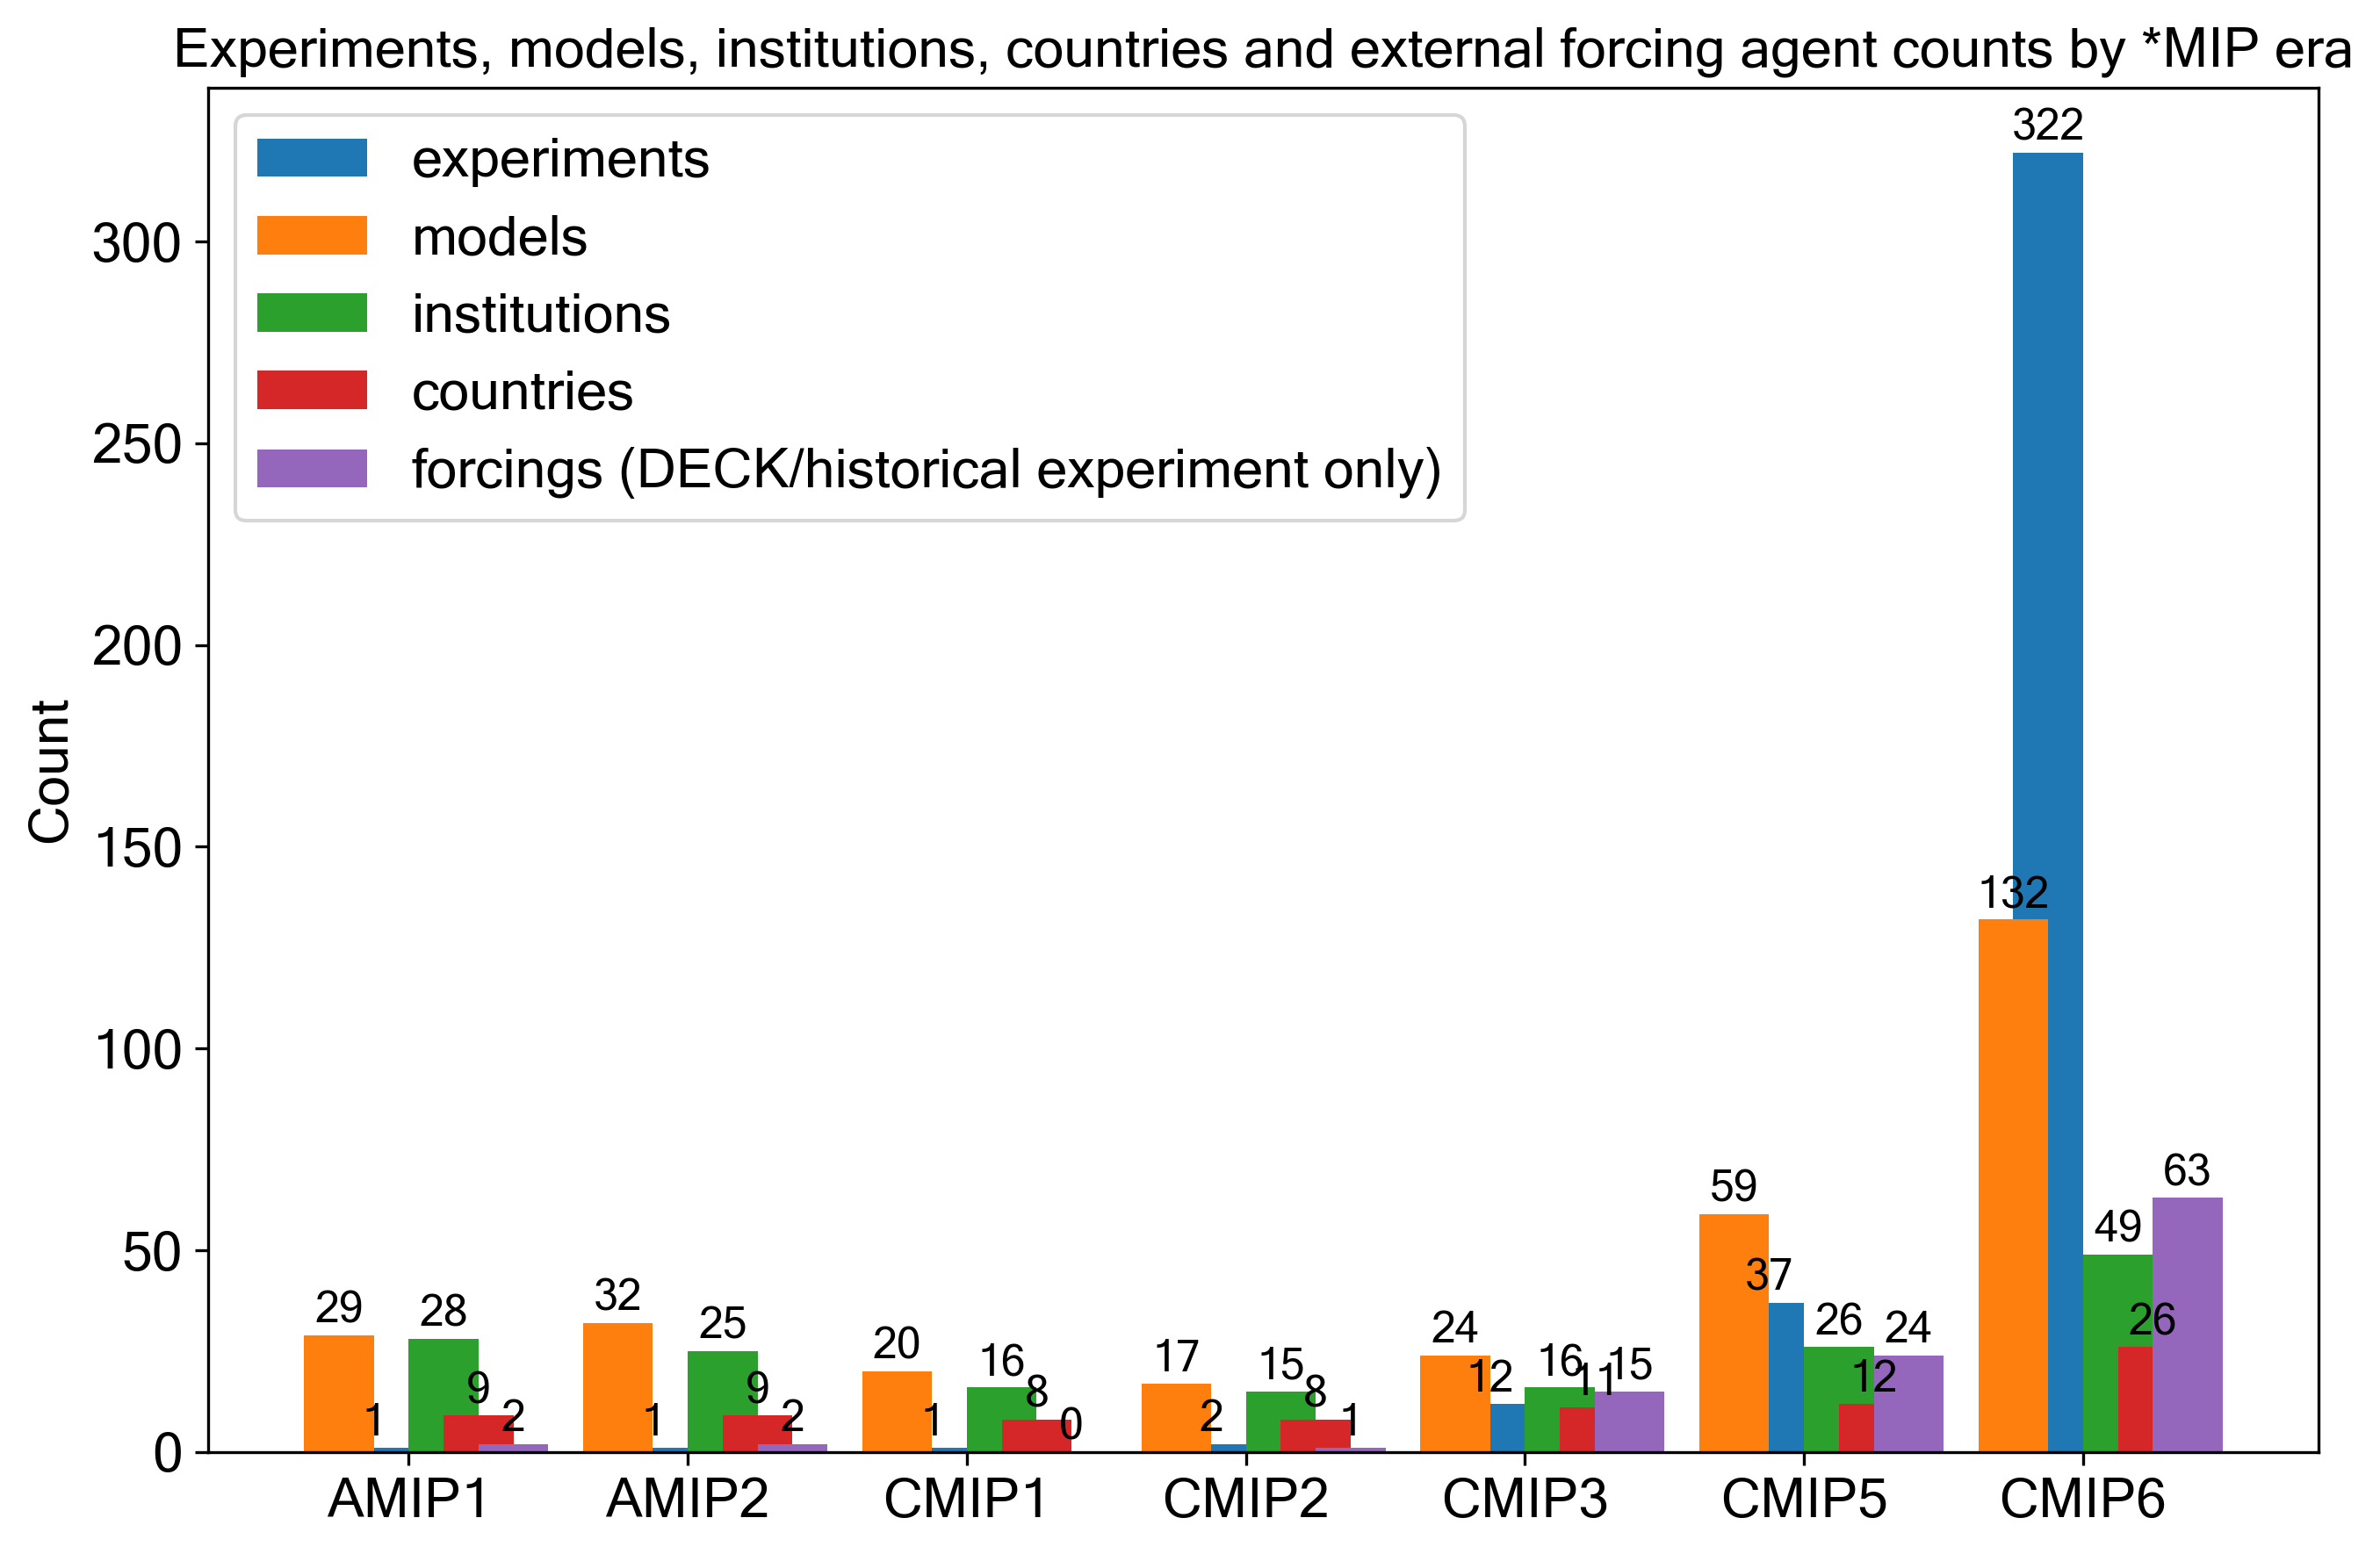

In [6]:
# set inputs
x = np.arange(len(labels))  # label locations
width = 0.25  # width of the bars
fontsize = 15
fontName = "Microsoft Sans Serif"

# initialize canvas
fig, ax = plt.subplots(figsize=(9, 6), dpi=300)

# plot
rects1 = ax.bar(x - width * 0.5, experiments, width, label="experiments")
rects3 = ax.bar(x - width, models, width, label="models")
rects2 = ax.bar(x + width * 0.5, institutions, width, label="institutions")
rects4 = ax.bar(x + width, countries, width, label="countries")
rects5 = ax.bar(
    x + width * 1.5,
    forcingCounts,
    width,
    label="forcings (DECK/historical experiment only)",
)

# pretty things up - add text for labels, title and custom x-axis tick labels, etc.
ax.set_title(
    "Experiments, models, institutions, countries and external forcing agent counts by *MIP era",
    fontname=fontName,
    fontsize=fontsize,
)
ax.set_ylabel("Count", fontname=fontName, fontsize=fontsize)
plt.yticks(fontname=fontName, fontsize=fontsize)
ax.set_xticks(x, labels, fontname=fontName, fontsize=fontsize)
ax.legend(prop={"family": fontName, "size": fontsize}, loc="upper left")

# label cleanup
padding = 1
labelSize = 12

ax.bar_label(rects1, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects2, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects3, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects4, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects5, padding=padding, fontname=fontName, fontsize=labelSize)

# fill canvas
fig.tight_layout()

# display, save and close
plt.show()
fig.savefig("_".join([timeFormat, "MIPEvolution-Counts-plusForcingFontAug.png"]))

## [now plot - data volumes across phases](#1p7-DataVolumes)

/var/folders/7d/rkhc67xs5w70chjmlrr6pv440017ch/T/ipykernel_22459/237210900.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.axes.axes.set_yticklabels(


[Text(1, 0.0, '0'), Text(1, 10000000.0, '1'), Text(1, 20000000.0, '2'), Text(1, 30000000.0, '3'), Text(1, 40000000.0, '4'), Text(1, 50000000.0, '5')]


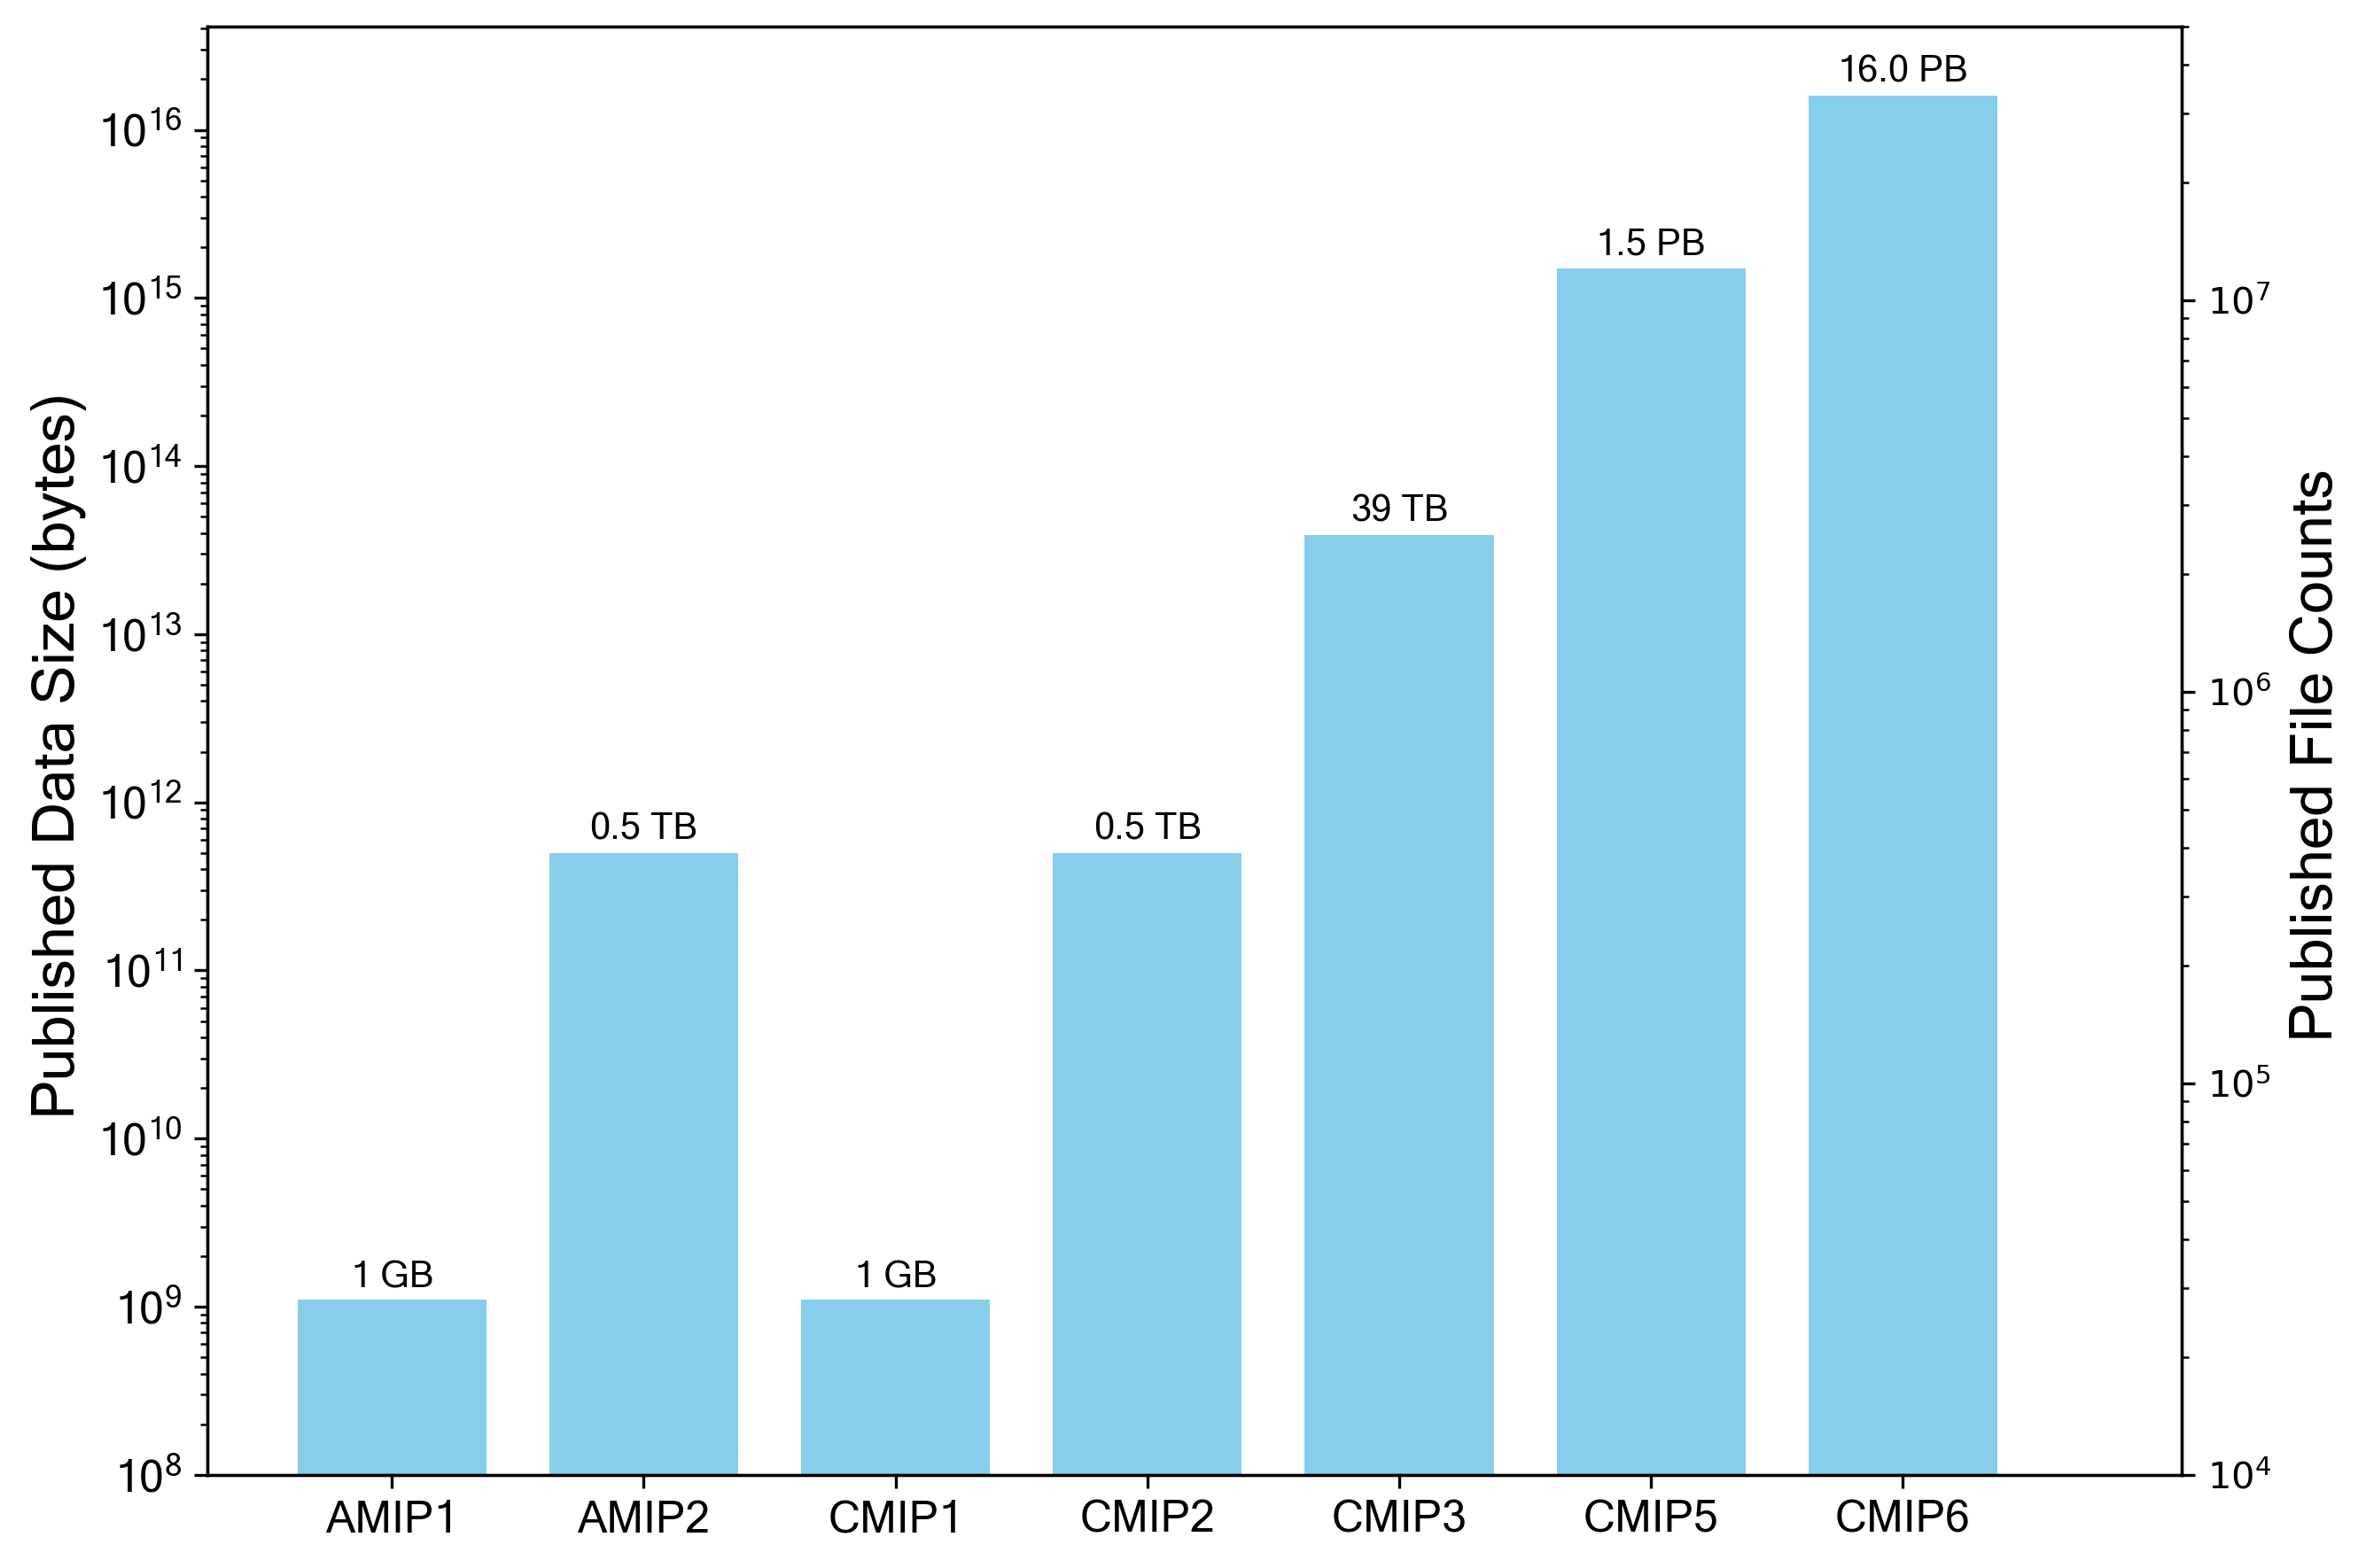

In [7]:
# plot characteristics
# Colours
# https://how2matplotlib.com/matplotlib-bar-colors.html
# https://www.pythoncharts.com/matplotlib/beautiful-bar-charts-matplotlib/
# https://e2eml.school/matplotlib_ticks
width = 0.75  # bar width
# Set fonts and sizes
fontName = "Microsoft Sans Serif"
fontSize = 12
fontSizeLab = 10
fontSizeAxLab = 16


# define addlabels function
def addlabels(labDic, data):
    mipKeys = list(labDic.keys())
    for i in range(len(labDic)):
        mipLab = mipKeys[i]
        mipSizeLab = labDic[mipLab]
        if mipSizeLab == "1 GB":
            plt.text(
                i,
                data[i] * 1.3,
                mipSizeLab,
                ha="center",
                fontsize=fontSizeLab,
                fontname=fontName,
            )
        else:
            plt.text(
                i,
                data[i] * 1.2,
                mipSizeLab,
                ha="center",
                fontsize=fontSizeLab,
                fontname=fontName,
            )


data = (1e9, 5e11, 1e9, 5e11, 39e12, 1.5e15, 16.0e15)
dataLabels = {}
dataLabels["AMIP1"] = "1 GB"
dataLabels["AMIP2"] = "0.5 TB"
dataLabels["CMIP1"] = "1 GB"
dataLabels["CMIP2"] = "0.5 TB"
dataLabels["CMIP3"] = "39 TB"
dataLabels["CMIP5"] = "1.5 PB"
dataLabels["CMIP6"] = "16.0 PB"

fig, ax1 = plt.subplots(figsize=(9, 6), dpi=300)
x = np.arange(len(data))
ax1.bar(x, data, width, bottom=1e8, color="skyblue")

# Set plot formatting
ax1.set_xticks(x, labels=dataLabels, fontsize=fontSize, fontname=fontName)
ax1.set_yscale("log")
ax1.set_ylabel("Published Data Size (bytes)", fontsize=fontSizeAxLab, fontname=fontName)
ax1.axes.axes.set_yticklabels(
    ax1.get_yticklabels(), fontsize=fontSize, fontname=fontName
)

# define overplot labels
addlabels(dataLabels, data)

# Create the secondary axes sharing the x-axis
ax2 = ax1.twinx()
ax2.bar(x + width * 0.5, [0] * 7, width, bottom=1e4, color="red")
ax2.set_ylim(10000.0, 50000000.0)
ax2.set_ylabel("Published File Counts", fontsize=fontSizeAxLab, fontname=fontName)
print(ax2.get_yticklabels())
ax2.set_yscale("log")  # Set the secondary y-axis to log scale

# fill canvas
fig.tight_layout()

# display, save, and close
plt.show()
fig.savefig("_".join([timeFormat, "MIPEvolution-DataSize.png"]), dpi=300)

## [now plot - data volumes an file counts across phases](#1p8-DataVolumesFileCounts)

/var/folders/7d/rkhc67xs5w70chjmlrr6pv440017ch/T/ipykernel_22459/1999324607.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.axes.axes.set_yticklabels(


[Text(1, 1000.0, '$\\mathdefault{10^{3}}$'), Text(1, 10000.0, '$\\mathdefault{10^{4}}$'), Text(1, 100000.0, '$\\mathdefault{10^{5}}$'), Text(1, 1000000.0, '$\\mathdefault{10^{6}}$'), Text(1, 10000000.0, '$\\mathdefault{10^{7}}$'), Text(1, 100000000.0, '$\\mathdefault{10^{8}}$'), Text(1, 1000000000.0, '$\\mathdefault{10^{9}}$')]


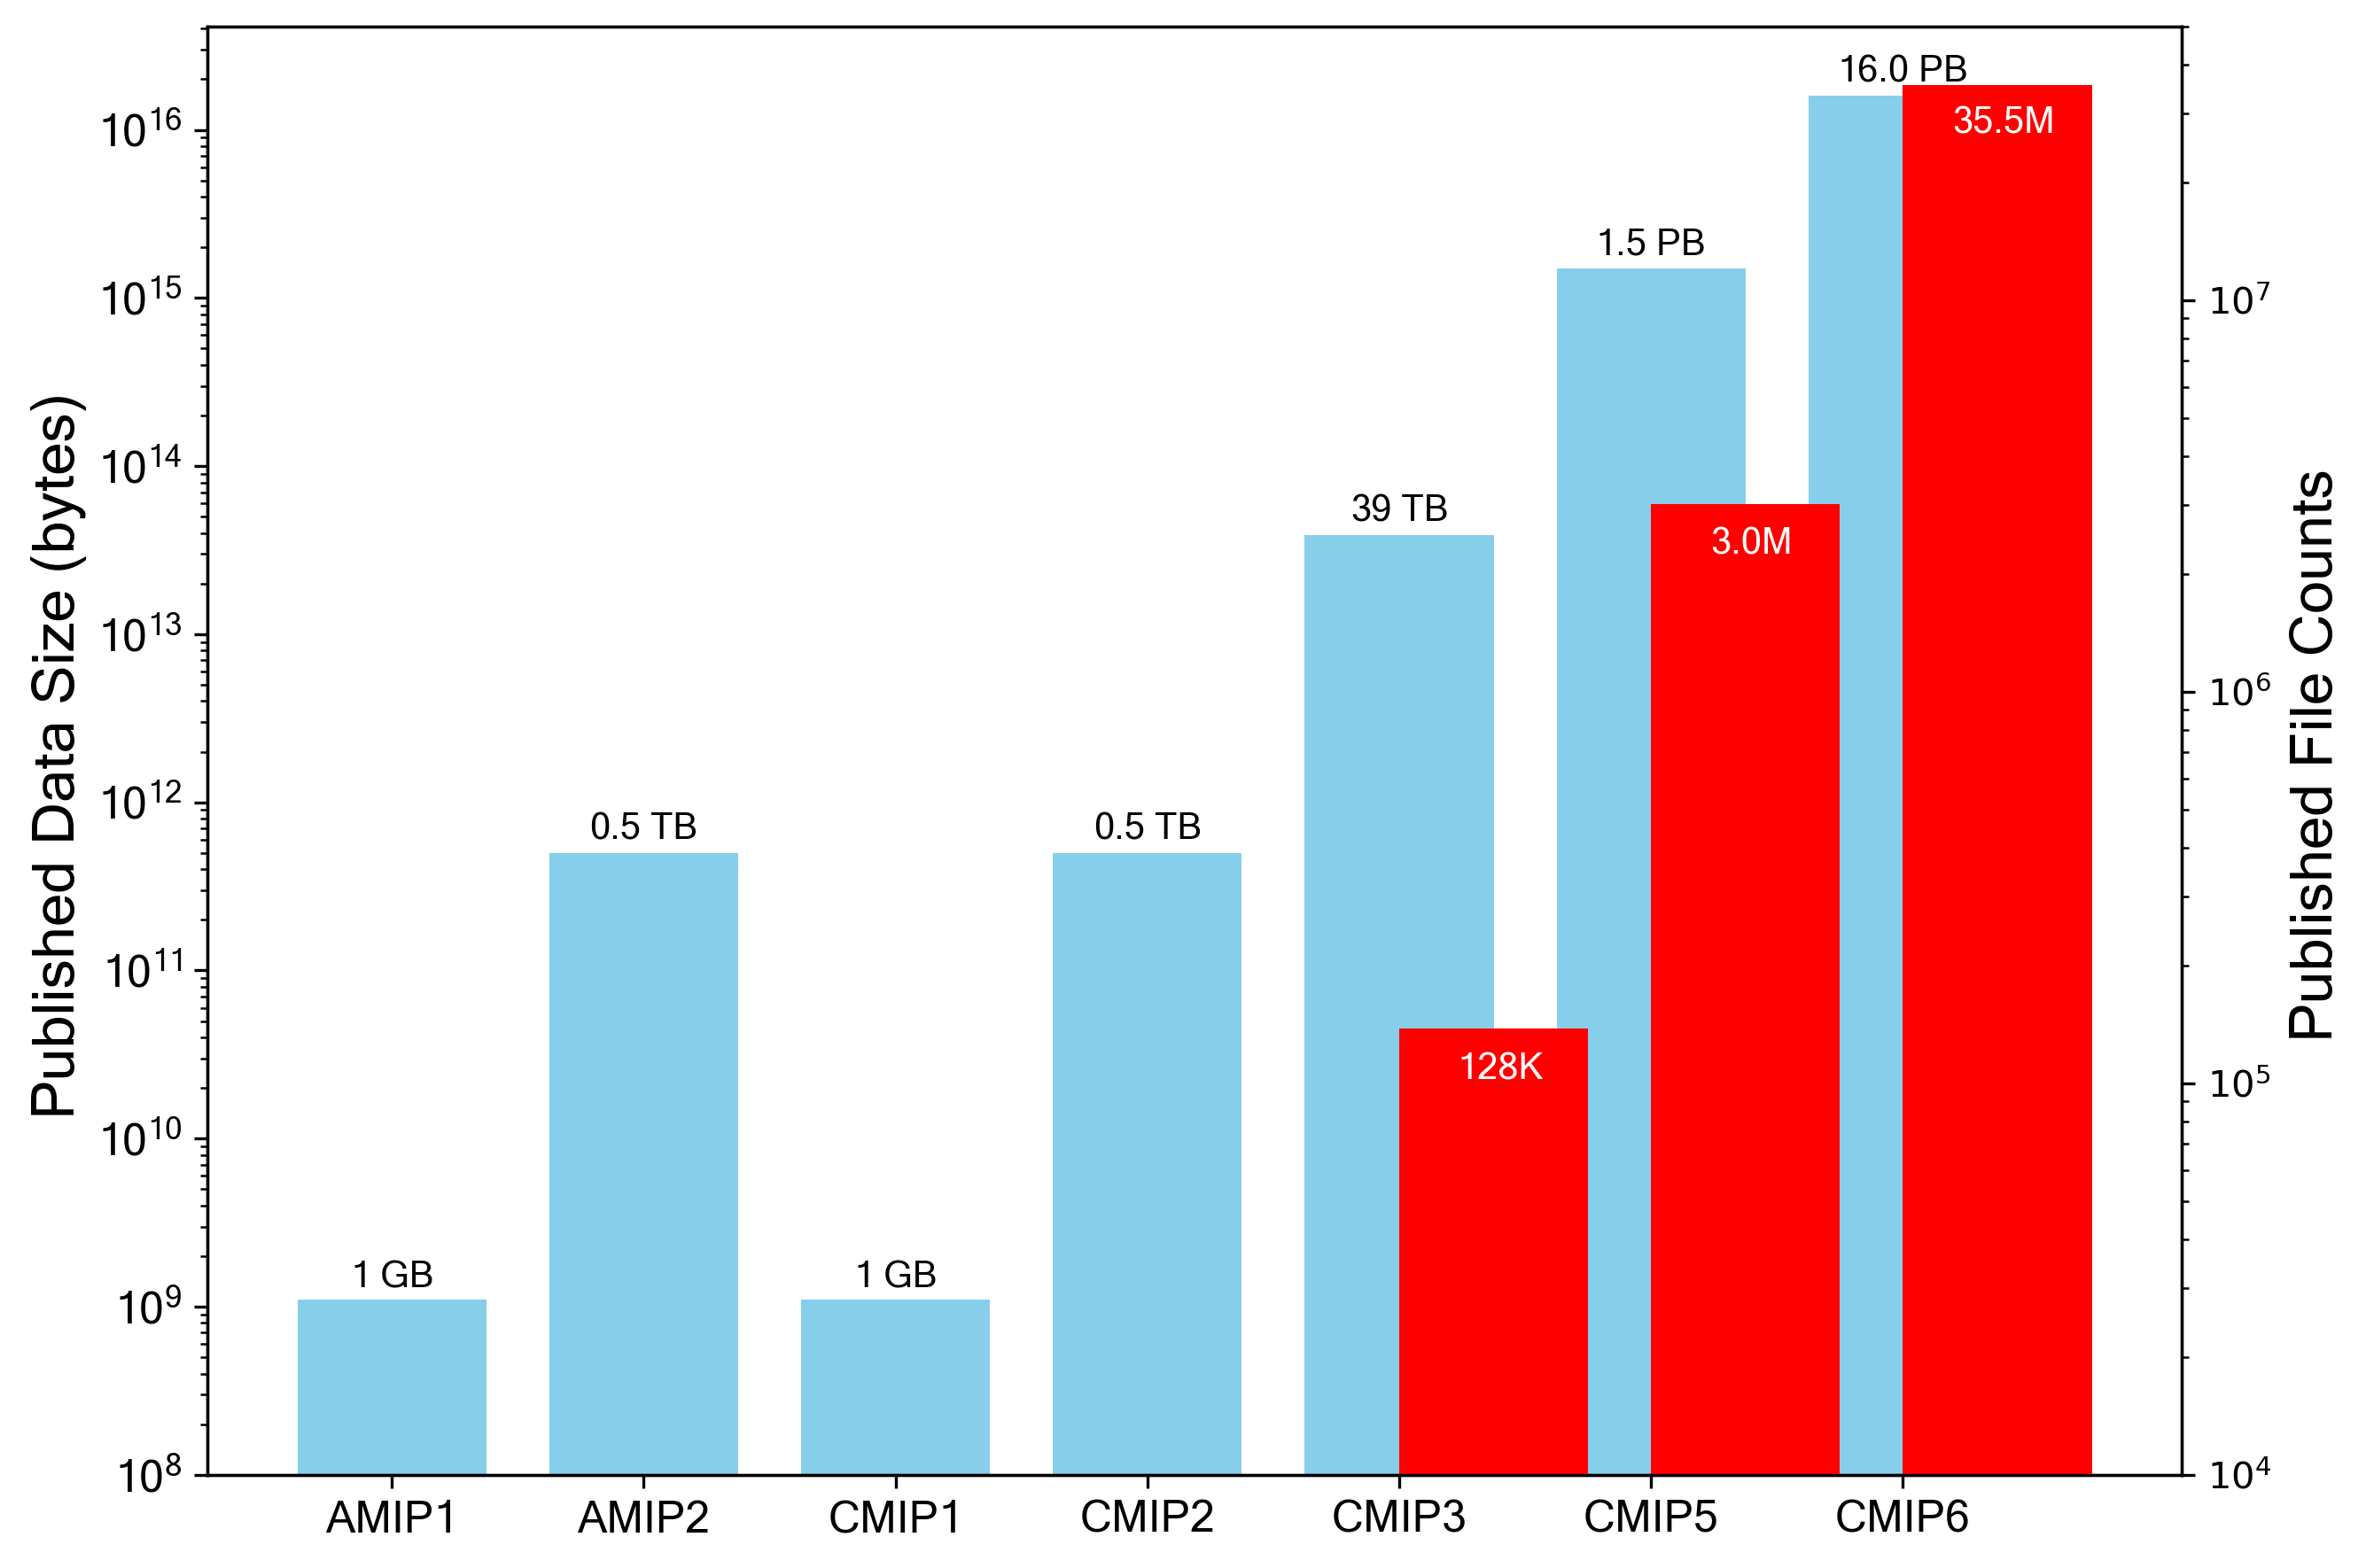

In [8]:
# plot characteristics
# Colours
# https://how2matplotlib.com/matplotlib-bar-colors.html
# https://www.pythoncharts.com/matplotlib/beautiful-bar-charts-matplotlib/
# https://e2eml.school/matplotlib_ticks
width = 0.75  # bar width
# Set fonts and sizes
fontName = "Microsoft Sans Serif"
fontSize = 12
fontSizeLab = 10
fontSizeAxLab = 16


# define addlabels function
def addlabels(labDic, data):
    mipKeys = list(labDic.keys())
    for i in range(len(labDic)):
        mipLab = mipKeys[i]
        mipSizeLab = labDic[mipLab]
        if mipSizeLab == "1 GB":
            plt.text(
                i,
                data[i] * 1.3,
                mipSizeLab,
                ha="center",
                fontsize=fontSizeLab,
                fontname=fontName,
            )
        elif mipSizeLab in ["128K"]:
            plt.text(
                i + 0.4,
                counts[i] * 0.8,
                mipSizeLab,
                ha="center",
                fontsize=fontSizeLab,
                fontname=fontName,
                color=(1.0, 1.0, 1.0),
            )
        elif mipSizeLab in ["3.0M", "35.5M"]:
            plt.text(
                i + 0.4,
                counts[i] * 0.75,
                mipSizeLab,
                ha="center",
                fontsize=fontSizeLab,
                fontname=fontName,
                color=(1.0, 1.0, 1.0),
            )
        else:
            plt.text(
                i,
                data[i] * 1.2,
                mipSizeLab,
                ha="center",
                fontsize=fontSizeLab,
                fontname=fontName,
            )


# Define data sizes
data = (1e9, 5e11, 1e9, 5e11, 39e12, 1.5e15, 16.0e15)
dataLabels = {}
dataLabels["AMIP1"] = "1 GB"
dataLabels["AMIP2"] = "0.5 TB"
dataLabels["CMIP1"] = "1 GB"
dataLabels["CMIP2"] = "0.5 TB"
dataLabels["CMIP3"] = "39 TB"
dataLabels["CMIP5"] = "1.5 PB"
dataLabels["CMIP6"] = "16.0 PB"

# Define file counts
counts = (np.nan, np.nan, np.nan, np.nan, 128.0e3, 3.0e6, 35.5e6)
countsLabels = {}
countsLabels["AMIP1"] = ""
countsLabels["AMIP2"] = ""
countsLabels["CMIP1"] = ""
countsLabels["CMIP2"] = ""
countsLabels["CMIP3"] = "128K"
countsLabels["CMIP5"] = "3.0M"
countsLabels["CMIP6"] = "35.5M"

fig, ax1 = plt.subplots(figsize=(9, 6), dpi=300)
x = np.arange(len(data))
ax1.bar(x, data, width, bottom=1e8, color="skyblue")

# Set plot formatting
ax1.set_xticks(x, labels=dataLabels, fontsize=fontSize, fontname=fontName)
ax1.set_yscale("log")
ax1.set_ylabel("Published Data Size (bytes)", fontsize=fontSizeAxLab, fontname=fontName)
ax1.axes.axes.set_yticklabels(
    ax1.get_yticklabels(), fontsize=fontSize, fontname=fontName
)

# data - define overplot labels
addlabels(dataLabels, data)

# Create the secondary axes sharing the x-axis
ax2 = ax1.twinx()
ax2.bar(x + width * 0.5, counts, width, bottom=1e4, color="red")
ax2.set_ylim(10000.0, 50000000.0)
ax2.set_ylabel("Published File Counts", fontsize=fontSizeAxLab, fontname=fontName)
ax2.set_yscale("log")  # Set the secondary y-axis to log scale
print(ax2.get_yticklabels())

# counts - define overplot labels
addlabels(countsLabels, counts)

# fill canvas
fig.tight_layout()

# display, save, and close
plt.show()
fig.savefig("_".join([timeFormat, "MIPEvolution-DataSize-FileCounts.png"]), dpi=300)